In [1]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#Load data file
aug_test = "Data Files/aug_test.csv"

#Read August Data and store into DataFrame
August_Test = pd.read_csv(aug_test)

In [2]:
# View Data Headers for August Test File
August_Test_df = pd.read_csv(aug_test)
August_Test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
#Load August Train Data File
aug_train = "Data Files/aug_train.csv"

# View Data Headers for August Train File 
August_Train_df = pd.read_csv(aug_train)
August_Train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
#Load Sample Submission Sample Data File
sample_submission = "Data Files/sample_submission.csv"

# View Data Headers for Sample Submission File
Sample_Submission_df = pd.read_csv(sample_submission)
Sample_Submission_df.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [5]:
# create a sample dataframe with x amount of random rows

august_sample_df = August_Train_df
#.sample(1000)




In [8]:
# use dropna to remove rows with Nan values from dataframe

dropped_df = august_sample_df.dropna()
dropped_df

# reset index of dropped df for enrolee id
dropped_df.reset_index(inplace=True)
del dropped_df['index']
dropped_df.head()




,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [9]:
# check sample dataframe for duplicate enrollee_id

# Get the total number of enrollee
id_value = dropped_df["enrollee_id"].value_counts()
id_value_count = len(id_value)
id_value_count

# Getting the duplicate mice by ID number that shows up for enrollee ID.
dupe_enrollee = dropped_df.loc[dropped_df.duplicated
                                    (subset='enrollee_id'),'enrollee_id'].unique()

#print "there are x enrolees and y duplicates"
print(f'There are {id_value_count} enrollees and {dupe_enrollee} duplicates.')

There are 8955 enrollees and [] duplicates.


In [10]:
# use dropped_df to perform test analysis


In [11]:
gender_count = dropped_df["gender"].value_counts()
gender_count

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

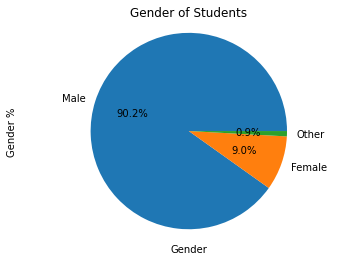

In [35]:
# Create Gender Plot
dropped_df["gender"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

# Format Graph
plt.title("Gender of Students")
plt.xlabel("Gender")
plt.ylabel("Gender %")
plt.axis("equal")
plt.legend
plt.savefig("Gender of Students.png")
plt.show()

In [13]:
education_count = dropped_df["education_level"].value_counts()
education_count

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

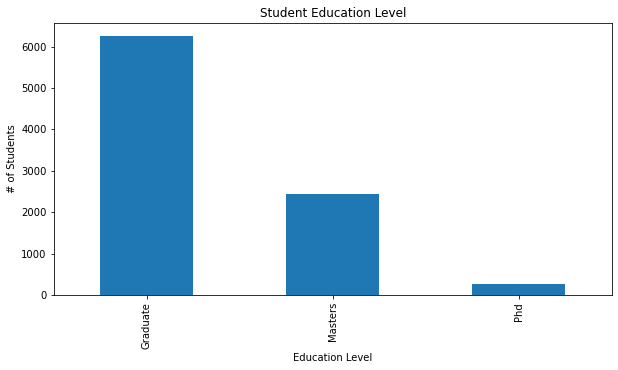

In [19]:
# Create Education Graph
bar_pandas = dropped_df["education_level"].value_counts()
bar_pandas.plot(kind="bar", figsize=(10,5))

# Format Graph
plt.xlabel("Education Level")
plt.ylabel("# of Students")
plt.title("Student Education Level")
plt.savefig("Student Education Level.png")
plt.show()

In [15]:
Major_count = dropped_df["major_discipline"].value_counts()
Major_count

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64

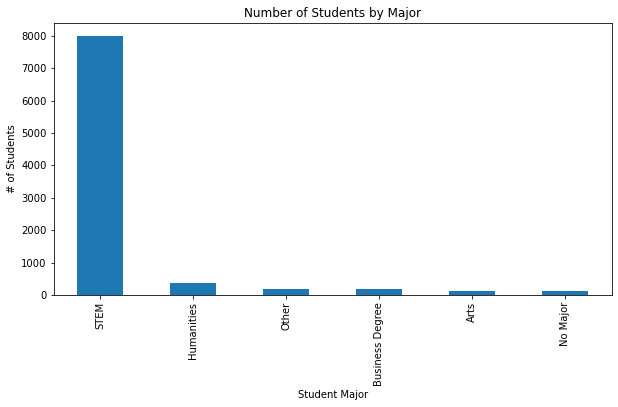

In [21]:
# Create Major Graph
bar_pandas = dropped_df["major_discipline"].value_counts()
bar_pandas.plot(kind="bar", figsize=(10,5))

# Format Graph
plt.xlabel("Student Major")
plt.ylabel("# of Students")
plt.title("Number of Students by Major")
plt.savefig("Number of Students by Major")
plt.show()

In [ ]:
# Perform a linear regression on Training Hours vs. Relevant Experience
(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern["Lat"], Northern["Max_Temp"])

# Get regression values
Regress_Values = (Northern["Lat"]) * slope + intercept
Regress_Values